# Laboratorio 12: Random Forest

## Nicolás Echeverri Rojas

Los arboles de desicion se ajustan muy bien a los datos de entrenamiento, sin embargo no permiten generalización. El overfiting es la caracteristica mas importante. Para dar solucion, se propone el algoritmo de random foreset basado en dos caracteristicas:

# 1. Se entrenan varios árboles con diferentes subconjuntos del dataset original. Para ello se emplea bootstraping dentro de los datos del dataset inicial.


Dado un dataset con las siguientes caracteristicas:


|index|$y^{}$          |X1  |X2 |X3 |X4 |
|-|----------|-----|-----|-----|-----|
|1| |$y^{(1)}$ |$X_1^{1}$|$X_2^{1}$|$X_3^{1}$|$X_4^{1}$|
|2||$y^{(2)}$ |$X_1^{2}$|$X_2^{2}$|$X_3^{2}$|$X_4^{2}$|
|3||$y^{(3)}$ |$X_1^{3}$|$X_2^{3}$|$X_3^{3}$|$X_4^{3}$|
|4||$y^{(4)}$ |$X_1^{4}$|$X_2^{4}$|$X_3^{4}$|$X_4^{4}$|


Podemos definir como un hiperparametro el número de arboles, y también los datos que ingresan a cada árbol, para ello emplearemos la tecnica de [bootstraping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics).


El botstrapping es una técnica de muestreo con reposición que se realiza para cada árbol, asi si se tienen 10 árboles, el muestreo con reposicion  para los indices puede ser como sigue:
```

In: np.random.randint(0, 4, (10,4))

  
Out: array([[1, 0, 3, 3],
       [2, 1, 2, 0],
       [2, 3, 3, 3],
       [0, 2, 2, 3],
       [2, 0, 3, 3],
       [1, 1, 2, 0],
       [2, 2, 1, 2],
       [3, 0, 1, 0],
       [3, 1, 0, 2],
       [2, 0, 2, 0]])

```

Lo anterior quiere decir que el conjunto de datos del árbol 1, puede ser entrenado con las  X1, X2, X3, X4 con los datos de entrenamiento 2, 1, 2, 0


Cada fila del anterior array es usado como input para entrenar cada arbol, notese que los valores se puden repetir para entrenar el árbol i-esimo. 


- Para cada nodo de todos los arboles se selecciona un número aleatorio de características, hasta cosntruir el árbol completo. 


Al final se tendran un conjunto de arboles de desición sobre los cuales se aplicará agregación, es decir, cuando se pasa un nuevo dato de entrenamiento los arboles realizan la clasificación y se toma el valor elegido por la mayoria de los arboles



bagging = Agregation + bootstraping


Random forest permite seleccionar las caracteristicas más importantes


La estategia para optimizar los bosques pueden ser elegidos como sigue:

Fijar el numero de caracteristicas y el criterio de parada.

1. Determinar el error como función del número de árboles.

2. Definido el número de árboles y calculamos el error como función del numero de caracteristicas.

3. Con el numero de arboles fijo y el numero de caracteristicas, se optmiza el criterio de parada, (numero minimo de datos de una hoja)




REF: https://www.youtube.com/watch?v=3pa0vtW64Ic&ab_channel=CodificandoBits
https://en.wikipedia.org/wiki/Bootstrap_aggregating

ref: http://www.cs.cmu.edu/~qyj/papersA08/11-rfbook.pdf

ref : https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb


In [1]:
#https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb

## Ejemplo de uso Random Forest

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#Crea unos datos
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)




clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

print(clf.predict([[0, 0, 0, 0]]))

[1]


## Laboratorio: 

1. Cargar load digitis
```
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

2, Aplicar random foreset usando sklearn

## 1. Carga de datos

(1797, 64)


<Figure size 432x288 with 0 Axes>

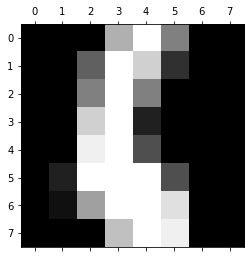

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[95])
plt.show()

In [4]:
X = digits.data

In [5]:
X.shape

(1797, 64)

In [6]:
y = digits.target

In [7]:
y.shape

(1797,)

Se observa que existen 1797 dígitos a clasificar

## 2. Separación de los datos

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 

In [12]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
train_set.shape, train_labels.shape, test_set.shape , test_labels.shape

((1437, 64), (1437,), (360, 64), (360,))

## 3. Clasificación de los datos

In [14]:
forest_clf = RandomForestClassifier(random_state=42) 
forest_clf.fit(train_set, train_labels) 
#forest_clf.predict([some_digit]) 
#forest_clf.predict_proba([some_digit])

RandomForestClassifier(random_state=42)

##  4. Mejora de hiperparámetros

## 4.1 Grid search

In [15]:
from sklearn.model_selection import GridSearchCV 

param_grid = {'n_estimators': [10, 20, 40, 60, 80, 100], 
              'max_features': [2, 4, 6, 8],
                'bootstrap': [False],
              'max_features': [2, 3, 4],
              'max_depth': [2,4,6]}

#_estimators int, default=100 The number of trees in the forest.

forest_clf = RandomForestClassifier() 
grid_search = GridSearchCV(forest_clf, param_grid, cv=5, 
                           scoring='neg_mean_squared_error', return_train_score=True) 
grid_search.fit(train_set, train_labels)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [False], 'max_depth': [2, 4, 6],
                         'max_features': [2, 3, 4],
                         'n_estimators': [10, 20, 40, 60, 80, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [16]:
grid_search.best_params_,np.sqrt(-grid_search.best_score_)

({'bootstrap': False, 'max_depth': 6, 'max_features': 4, 'n_estimators': 60},
 0.9264758658507363)

In [17]:
best_params = grid_search.best_params_

In [18]:
best_forest_clf = RandomForestClassifier(**best_params ) 
best_forest_clf.fit(train_set, train_labels)

RandomForestClassifier(bootstrap=False, max_depth=6, max_features=4,
                       n_estimators=60)

In [24]:
train_score = best_forest_clf.score(train_set, train_labels)
test_score = best_forest_clf.score( test_set, test_labels)

print(f" train score = {train_score:.3f}")
print(f" test score = {test_score:.3f}")

 train score = 0.983
 test score = 0.958


In [21]:
best_forest_clf.max_depth

6

## 4.2 Curvas de aprendizaje 

## 4.2.1 Accuracy vs número de árboles

In [49]:
n_estimators = np.arange(10,200,10)
train_score_list = []
test_score_list = []

for n_estimator in n_estimators:
    forest_clf = RandomForestClassifier(n_estimators = n_estimator) 

    forest_clf.fit(train_set, train_labels)

    train_score = forest_clf.score(train_set, train_labels)
    test_score = forest_clf.score( test_set, test_labels)
    
    train_score_list.append(train_score)
    test_score_list.append(test_score)

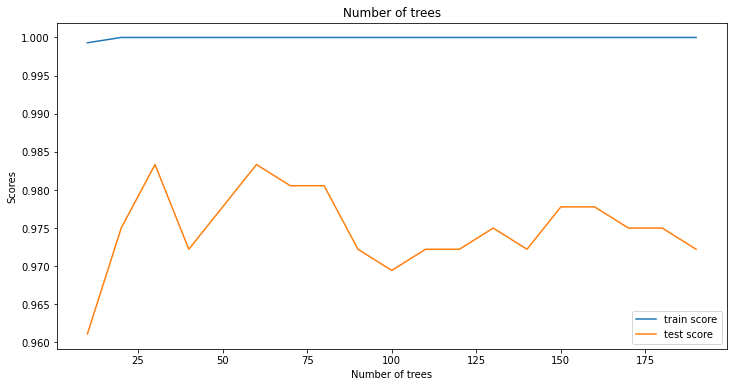

In [50]:
plt.figure(figsize=(12,6))
plt.title("Number of trees")
plt.plot(n_estimators,train_score_list, label = 'train score')
plt.plot(n_estimators,test_score_list, label = 'test score')
plt.xlabel("Number of trees")
plt.ylabel("Scores")
plt.legend()

In [51]:
optim_number_trees =n_estimators[np.argmax(test_score_list)]

print(f"el número óptimo de árboles es {optim_number_trees}")

el número óptimo de árboles es 30


## 4.2.2 Accuracy vs número de características usadas

In [52]:
n_features = ['sqrt','log2',10,20,30,40,50,60]
train_score_list = []
test_score_list = []

for n_feature in n_features:
    forest_clf = RandomForestClassifier(n_estimators = optim_number_trees,
                                       max_features =n_feature ) 

    forest_clf.fit(train_set, train_labels)

    train_score = forest_clf.score(train_set, train_labels)
    test_score = forest_clf.score( test_set, test_labels)
    
    train_score_list.append(train_score)
    test_score_list.append(test_score)

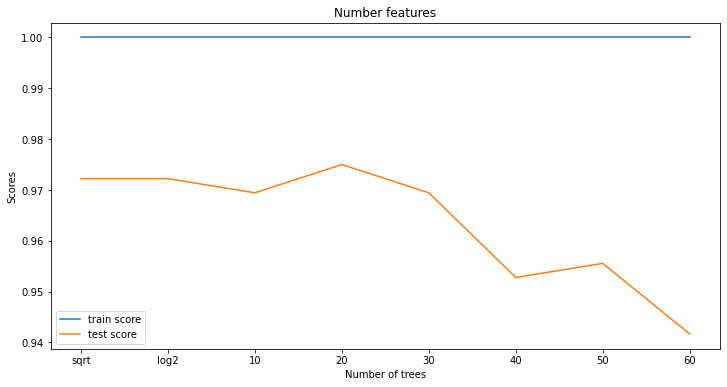

In [53]:
plt.figure(figsize=(12,6))
plt.title("Number features")
plt.plot(n_features,train_score_list, label = 'train score')
plt.plot(n_features,test_score_list, label = 'test score')
plt.xlabel("Number of trees")
plt.ylabel("Scores")
plt.legend()

In [54]:
optim_feature = n_features[np.argmax(test_score_list)]

print(f"el número óptimo de características es {optim_feature} i.e 8" )

el número óptimo de características es 20 i.e 8


## 4.2.3 Accuracy vs profundidad de los árboles

In [55]:
max_depths = [10,15,20,24,30,35,40,45,50,55,60,65,70,None]
train_score_list = []
test_score_list = []

for max_depth in max_depths:
    forest_clf = RandomForestClassifier(n_estimators = optim_number_trees,
                                       max_features =optim_feature,
                                       max_depth = max_depth) 

    forest_clf.fit(train_set, train_labels)

    train_score = forest_clf.score(train_set, train_labels)
    test_score = forest_clf.score( test_set, test_labels)
    
    train_score_list.append(train_score)
    test_score_list.append(test_score)

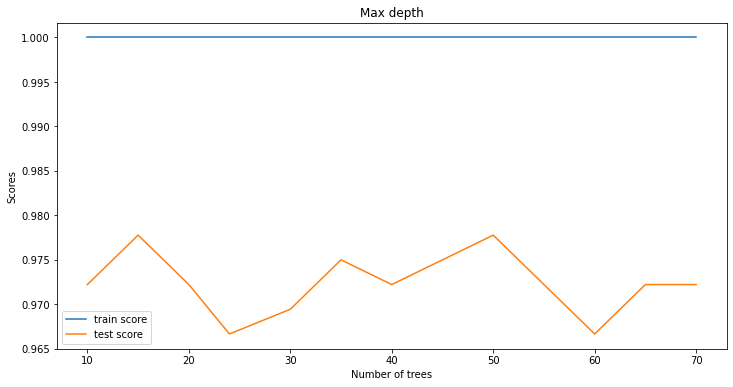

In [56]:
plt.figure(figsize=(12,6))
plt.title("Max depth")
plt.plot(max_depths,train_score_list, label = 'train score')
plt.plot(max_depths,test_score_list, label = 'test score')
plt.xlabel("Number of trees")
plt.ylabel("Scores")
plt.legend()

In [62]:
optim_max_depth = max_depths[np.argmax(test_score_list)]

print(f"profundidad óptima es {optim_max_depth } nodos")

profundidad óptima es 15 nodos


## 4.3 Curva de aprendizaje mejor modelo

In [70]:
from sklearn.model_selection import learning_curve

In [66]:
best_model_rf = RandomForestClassifier(n_estimators = optim_number_trees,
                                       max_features =optim_feature,
                                       max_depth = optim_max_depth) 

In [74]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("Time of fitting [s]")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("Time of fitting [s]")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

## 5. Matriz de confusión 

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix

In [80]:
best_model_rf.fit(train_set, train_labels)

RandomForestClassifier(max_depth=15, max_features=20, n_estimators=30)

C:\Users\nico0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


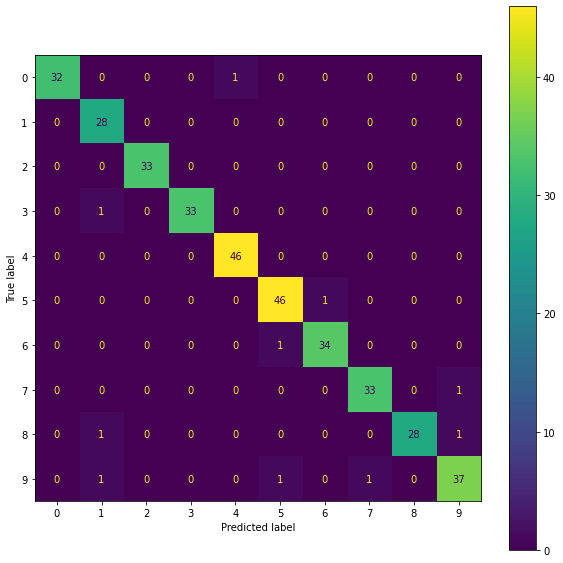

In [85]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_confusion_matrix(estimator=best_model_rf,
                X = test_set,
                y_true=  test_labels, ax = ax)

<module 'matplotlib.pyplot' from 'C:\\Users\\nico0\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

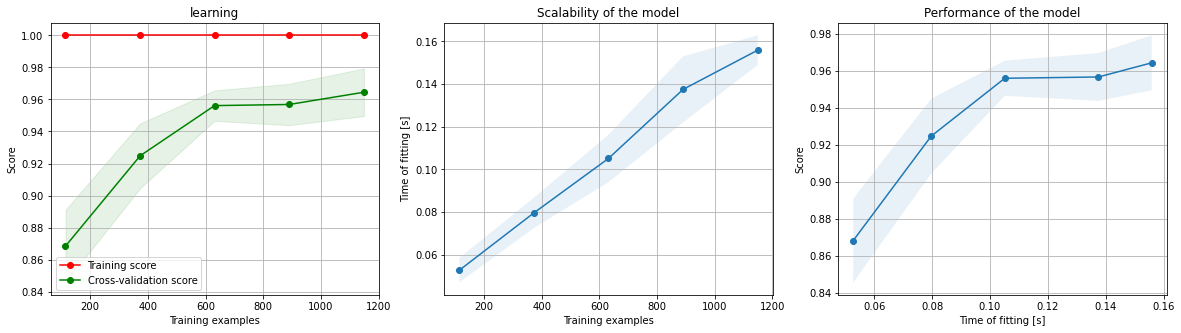

In [75]:
plot_learning_curve(best_model_rf,
                    'learning',train_set, train_labels)

## 6. Conclusiones 

- Se observa que a mayor cantidad de datos, mejor es el score en los datos de test

- El tiempo de de entrenamiento aumenta linealmente con el número de muestras

- El algoritmo es capaz de reconocer de muy buena manera los dígitos en el conjunto de entrenamiento
